<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 07 Revalidating The Prediction Model

### Riccardo Spolaor (864877)

</center>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import python_files.ValidationOperations as valop


In [2]:
dataframe = pd.read_csv('./datasets/dataframe06.csv', low_memory = False)

In [3]:
dataframe.head()

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,PlayedA,...,5_gamesMeanA>5_gamesMeanB,5_setsMeanA>5_setsMeanB,HandA,HandB,PlayedVsSameHandedA,PlayedVsSameHandedB,WonRatioVsSameHandedA,WonRatioVsSameHandedB,PlayedVsSameHandedA>PlayedVsSameHandedB,WonRatioVsSameHandedA>WonRatioVsSameHandedB
0,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0.0,0.0,0,0
1,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0.0,0.0,0,0
2,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0.0,0.0,0,0
3,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,1,0,0,0,0.0,0.0,0,0
4,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,1,0,0,0.0,0.0,0,0


In [4]:
dataframe.columns.values

array(['Winner', 'csvID', 'ATP', 'Location', 'Tournament', 'Series',
       'Court', 'Round', 'Best of', 'PlayedA', 'PlayedB', 'WonRatioA',
       'WonRatioB', 'RankA', 'RankFilledA', 'RankB', 'RankFilledB',
       'FadigueTournGamesA', 'FadigueTournGamesB', 'FadigueTournSetsA',
       'FadigueTournSetsB', 'PtsA', 'PtsFilledA', 'PtsB', 'PtsFilledB',
       'MaxA', 'MaxFilledA', 'MaxB', 'PlayedCourtA', 'PlayedCourtB',
       'WonRatioCourtA', 'WonRatioCourtB', 'MaxFilledB', 'AvgA',
       'AvgFilledA', 'AvgB', 'AvgFilledB', 'Carpet', 'Clay', 'Grass',
       'Hard', 'FEDERER R.A', 'FEDERER R.B', 'NADAL R.A', 'NADAL R.B',
       'DJOKOVIC N.A', 'DJOKOVIC N.B', 'MURRAY A.A', 'MURRAY A.B',
       'RODDICK A.A', 'RODDICK A.B', 'FERRER D.A', 'FERRER D.B',
       'BERDYCH T.A', 'BERDYCH T.B', 'HEWITT L.A', 'HEWITT L.B',
       'DEL POTRO J. M.A', 'DEL POTRO J. M.B', 'TSONGA J.W.A',
       'TSONGA J.W.B', 'CILIC M.A', 'CILIC M.B', 'WAWRINKA S.A',
       'WAWRINKA S.B', 'GASQUET R.A', 'GASQUET R

# Features Relevance Analysis
Controllo dell'accuratezza delle predizioni di un albero dove viene applicato il tuning alla profondità per il dataset:
* Con tutte le feature;
* Eliminando le feature con le caratteristiche specifiche del giocatore A e il giocatore B e lasciando solo le feature di confronto tra le caratteristiche dei due giocatori (*caratteristicaA>caratteristicaB*).

Scelgo le feature del secondo caso in quanto l'accuratezza risulta essere maggiore. 

In [5]:
feat_supposed_not_relevant = ['WonRatioCourtA', 'WonRatioCourtB', 'WonRatioA', 'WonRatioB', 'OpponentsPlayed', 
                              'OpponentsWRatioA','OpponentsWRatioB', 'HandB', 'HandA', 'RankA', 'RankB',  'PtsA',
                              'PtsB', 'MaxA', 'MaxB', 'AvgA', 'AvgB',  'PlayedA', 'PlayedB','PlayedCourtA', 
                              'PlayedCourtB', 'FadigueTournGamesA','FadigueTournGamesB', 'FadigueTournSetsA', 
                              'FadigueTournSetsB', 'PlayedVsSameHandedA', 'PlayedVsSameHandedB','WonRatioVsSameHandedA',
                              'WonRatioVsSameHandedB', '5_gamesMeanA', '5_gamesMeanB', '5_setsMeanA', '5_setsMeanB']

In [6]:
def test_relevant_attributes(dataframe, dropped = False):

    x_train, x_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],
                                                              dataframe['Winner'], test_size=0.33, shuffle=False,
                                                              stratify=None)
    
    accuracies = []

    for max_depth in range(2, 20):
        dt = DecisionTreeClassifier(max_depth=max_depth)

        dt.fit(x_train, y_train)

        train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(x_train))
        valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(x_valid))

        accuracies += [[valid_acc, train_acc, max_depth]]

    fig, ax = plt.subplots(figsize=(15, 10))
    fig.suptitle('Accuracy on all features' if dropped==False else 'Accuracy on subset of features supposed to e more relevant')
    valop.plot_estimator_accuracy(ax, accuracies, 'Depth')

    best_accuracy, _, best_depth = max(accuracies)
    print("Best Depth:", best_depth, '- Accuracy:', best_accuracy)

Best Depth: 5 - Accuracy: 0.6922762804806907
Wall time: 20.1 s


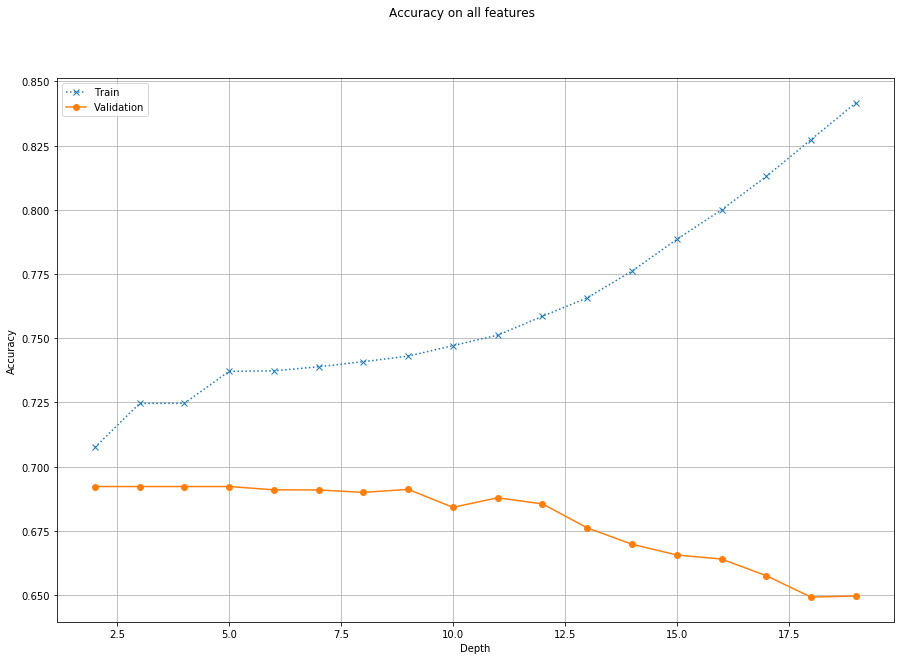

In [9]:
%%time
test_relevant_attributes(dataframe)

Best Depth: 3 - Accuracy: 0.6944347217360868
Wall time: 7.65 s


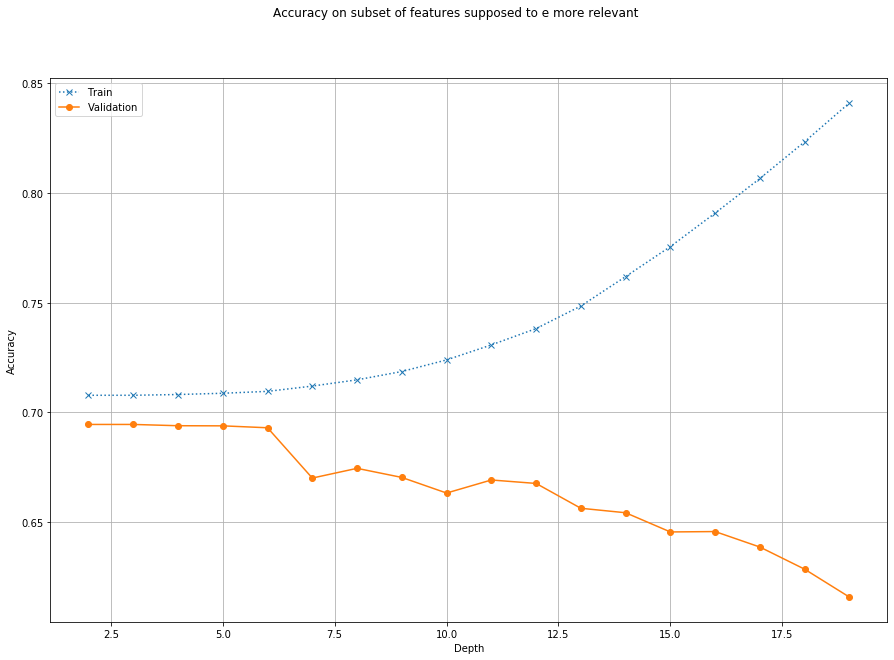

In [10]:
%%time
test_relevant_attributes(dataframe.drop(feat_supposed_not_relevant, axis = 1), True)

In [11]:
dataframe.drop(['WonRatioCourtA', 'WonRatioCourtB', 'WonRatioA', 'WonRatioB',
                'OpponentsPlayed', 'OpponentsWRatioA',
                'OpponentsWRatioB', 'HandA', 'HandB', 'HandA',
                'RankA', 'RankB',  'PtsA', 'PtsB', 'MaxA', 'MaxB', 'AvgA', 'AvgB',  'PlayedA', 'PlayedB',
                'PlayedCourtA', 'PlayedCourtB', 'FadigueTournGamesA','FadigueTournGamesB',
                'FadigueTournSetsA', 'FadigueTournSetsB', 
                'PlayedVsSameHandedA', 'PlayedVsSameHandedB','WonRatioVsSameHandedA','WonRatioVsSameHandedB',
                '5_gamesMeanA', '5_gamesMeanB', '5_setsMeanA', '5_setsMeanB',
               ], axis = 1, inplace = True)

# Validation

Best Max csvID: 0 - Accuracy: 0.6944347217360868
Wall time: 1min 1s


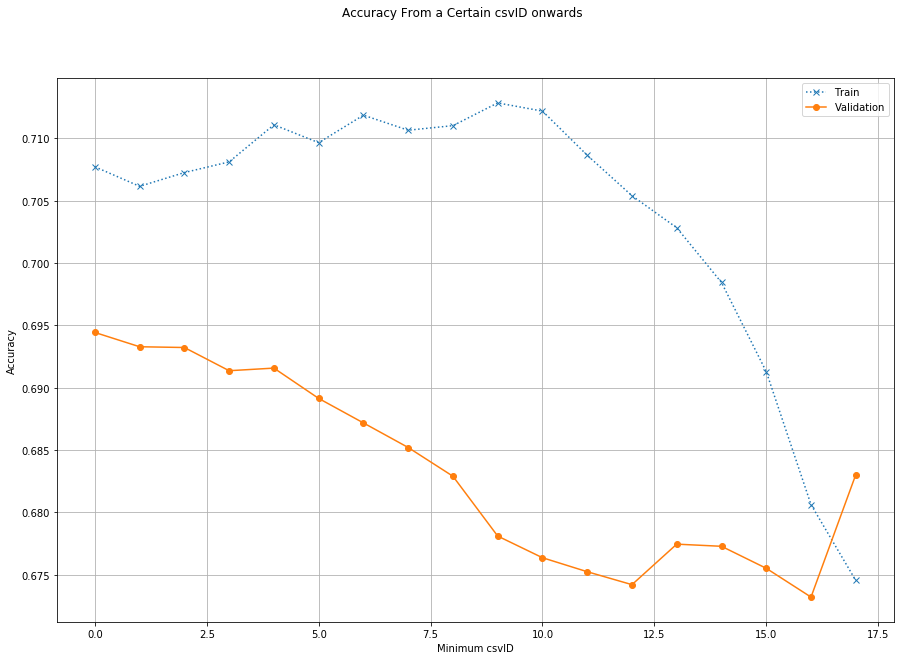

In [12]:
%%time
best_dataframe_split_index = valop.get_best_dataframe_split(dataframe)

In [13]:
dataframe = dataframe[dataframe['csvID'] >= best_dataframe_split_index]

dataframe.head()

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,RankFilledA,...,RetiredLastA,RetiredLastB,PlayedA>PlayedB,WonRatioA>WonRatioB,PlayedCourtA>PlayedCourtB,WonRatioCourtA>WonRatioCourtB,5_gamesMeanA>5_gamesMeanB,5_setsMeanA>5_setsMeanB,PlayedVsSameHandedA>PlayedVsSameHandedB,WonRatioVsSameHandedA>WonRatioVsSameHandedB
0,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0


## Decision Tree

Best Max Depth: 3 - Accuracy: 0.6944347217360868
Best Max Features: 44 - Accuracy: 0.6944930579862326
Wall time: 19.3 s


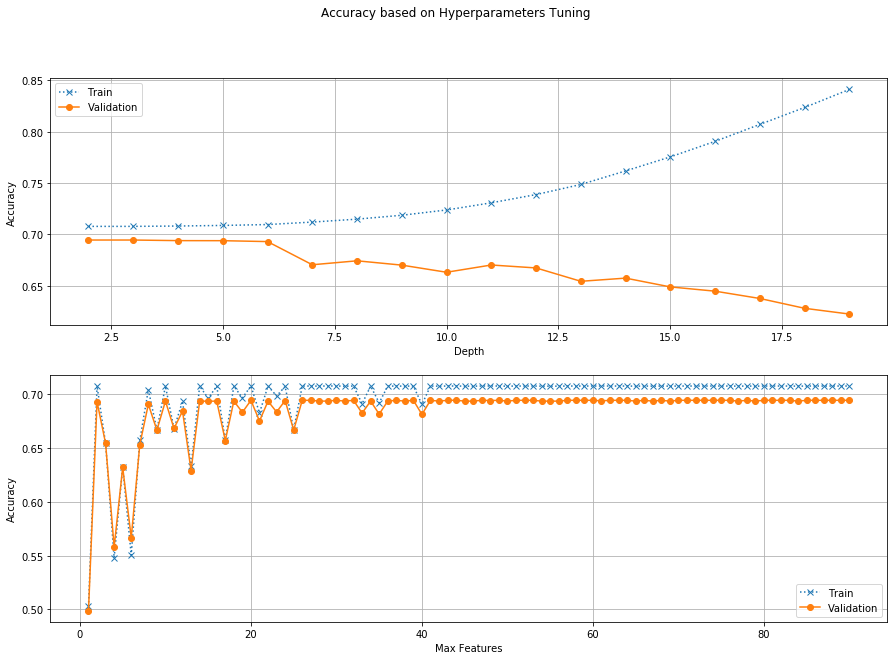

In [14]:
%%time
tree_best_features = valop.validate_tree_classifier(dataframe)

Wall time: 22.8 s


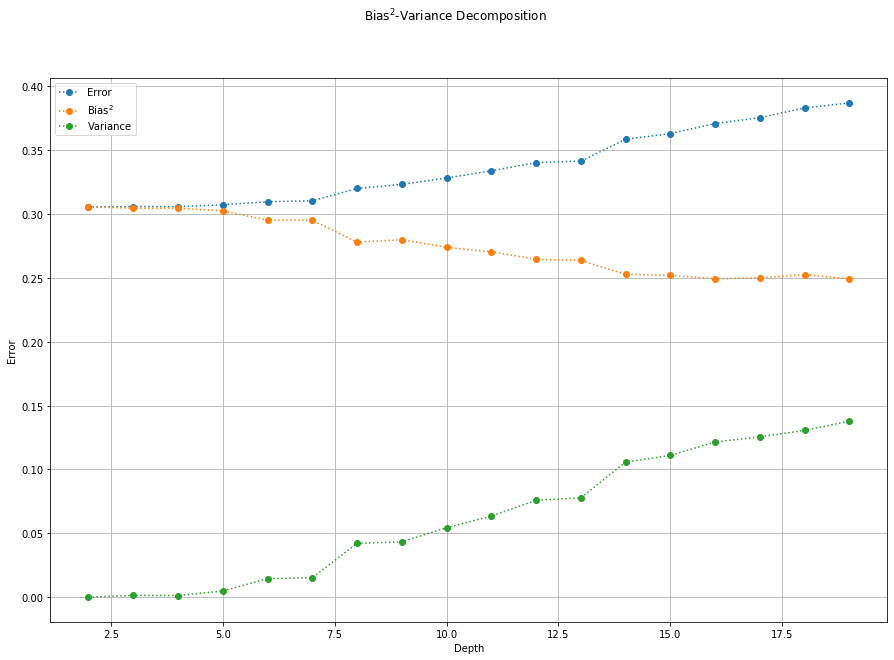

In [15]:
%%time
from sklearn.tree import DecisionTreeClassifier
valop.get_tree_variance_bias_decomposition(dataframe)

## Bagging

Best Number of Estimators: 225 - Accuracy: 0.6939096954847742
Wall time: 1min 50s


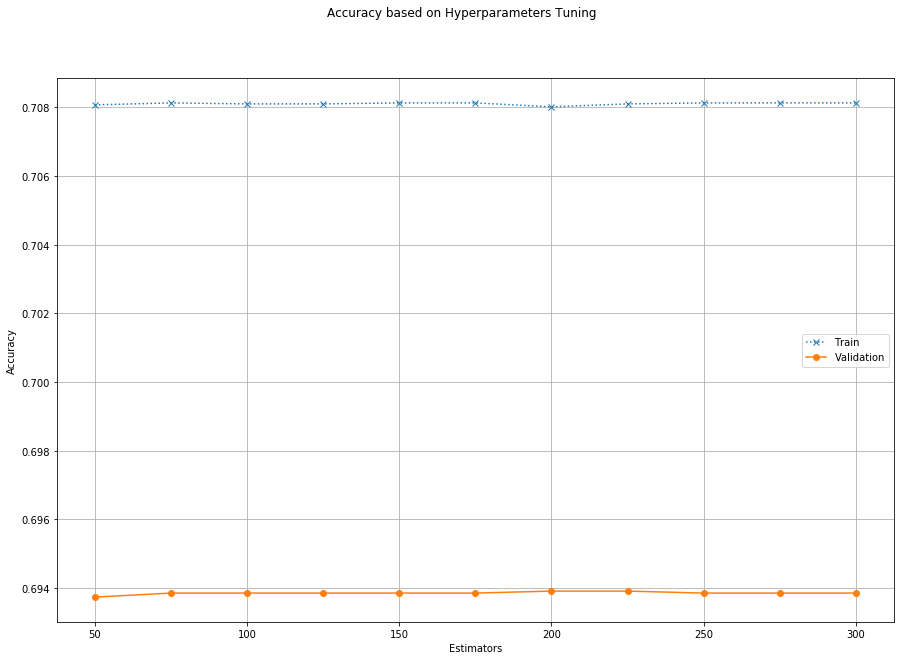

In [25]:
%%time
bagged_tree_best_n_estimators = valop.validate_bagged_tree_classifier(dataframe, tree_best_features)

Wall time: 2min 43s


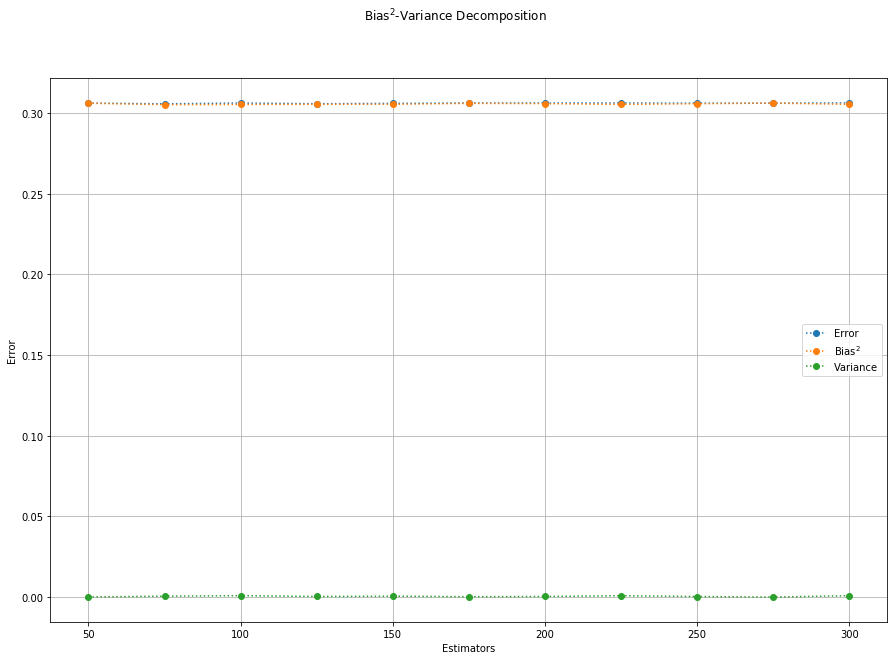

In [26]:
%%time
valop.get_bagged_tree_variance_bias_decomposition(dataframe, DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']))

## AdaBoost

Best Number of Estimators: 3 - Accuracy: 0.6942013767355034
Wall time: 22.8 s


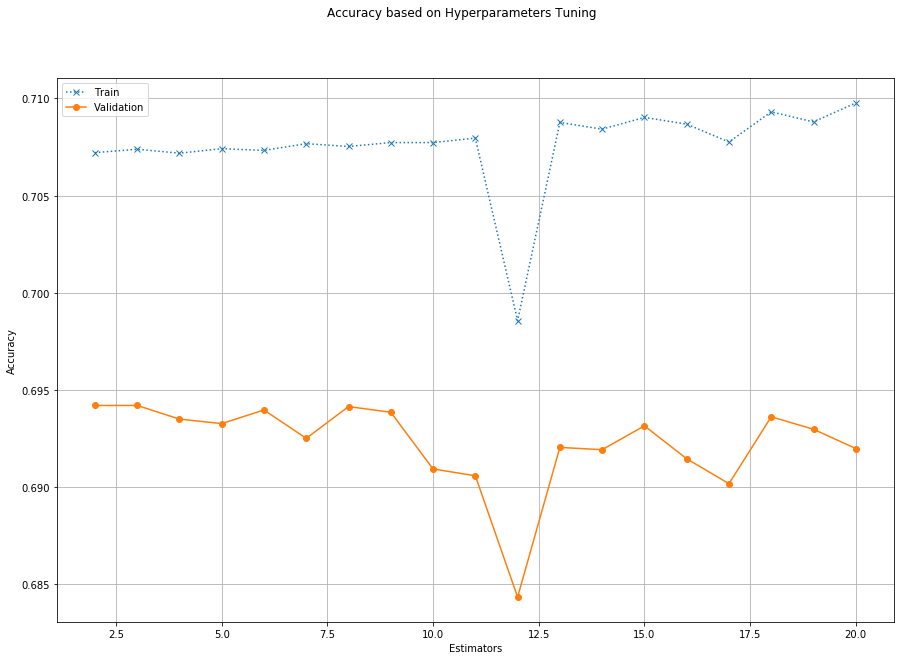

In [27]:
%%time
boosted_tree_best_n_estimators = valop.get_best_boosted_tree_n_estimators(dataframe, tree_best_features)

Wall time: 42.1 s


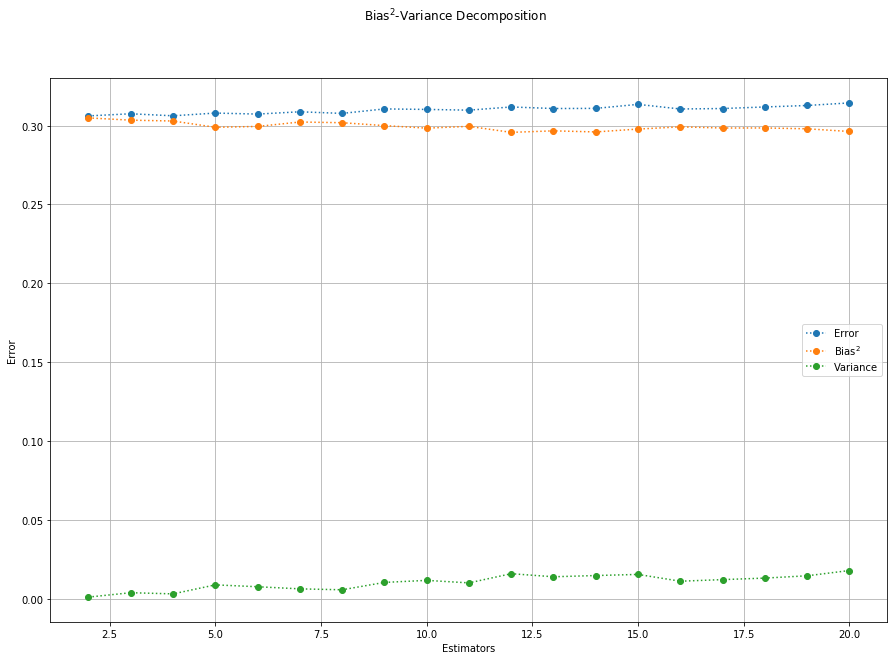

In [28]:
%%time
valop.get_boosted_tree_variance_bias_decomposition(dataframe, DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']))

## Random Forest

Best Estimators Number 175 - Accuracy: 0.6651499241628748
Best Depth 15 - Accuracy: 0.6942597129856493
Wall time: 2min 16s


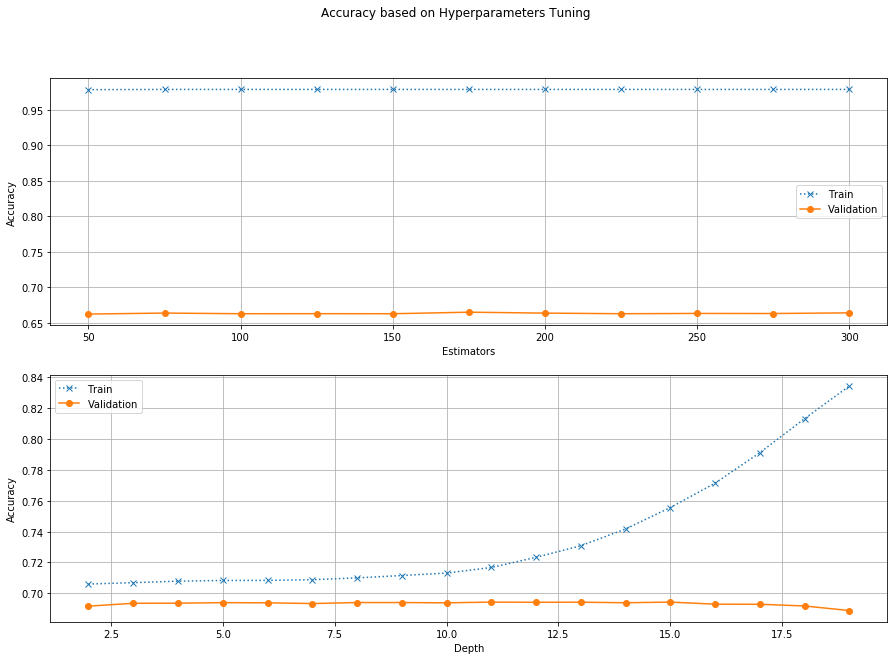

In [16]:
%%time
forest_best_features = valop.validate_forest_classifier(dataframe)


Wall time: 2min 13s


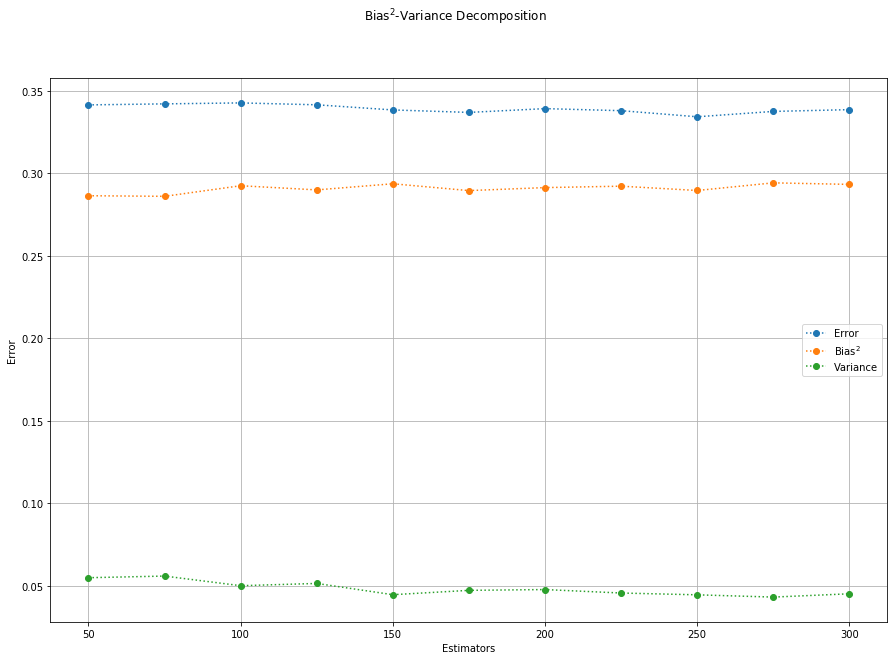

In [17]:
%%time
valop.get_forest_variance_bias_decomposition(dataframe)

Wall time: 1min 49s


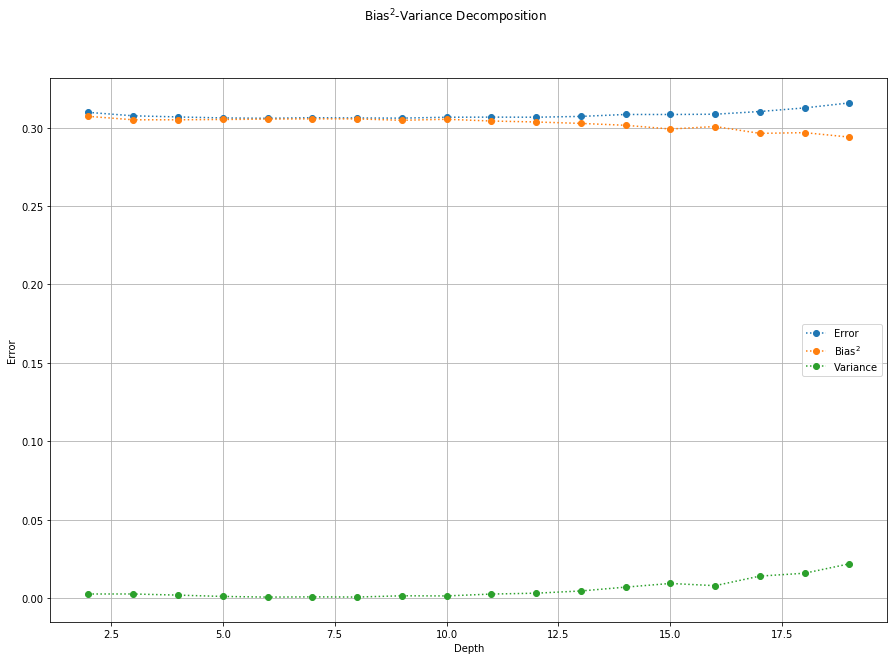

In [18]:
%%time
valop.get_forest_variance_bias_decomposition(dataframe, forest_best_features['n_estimators'])

## Feature Importances e Recursive Feature Elimination

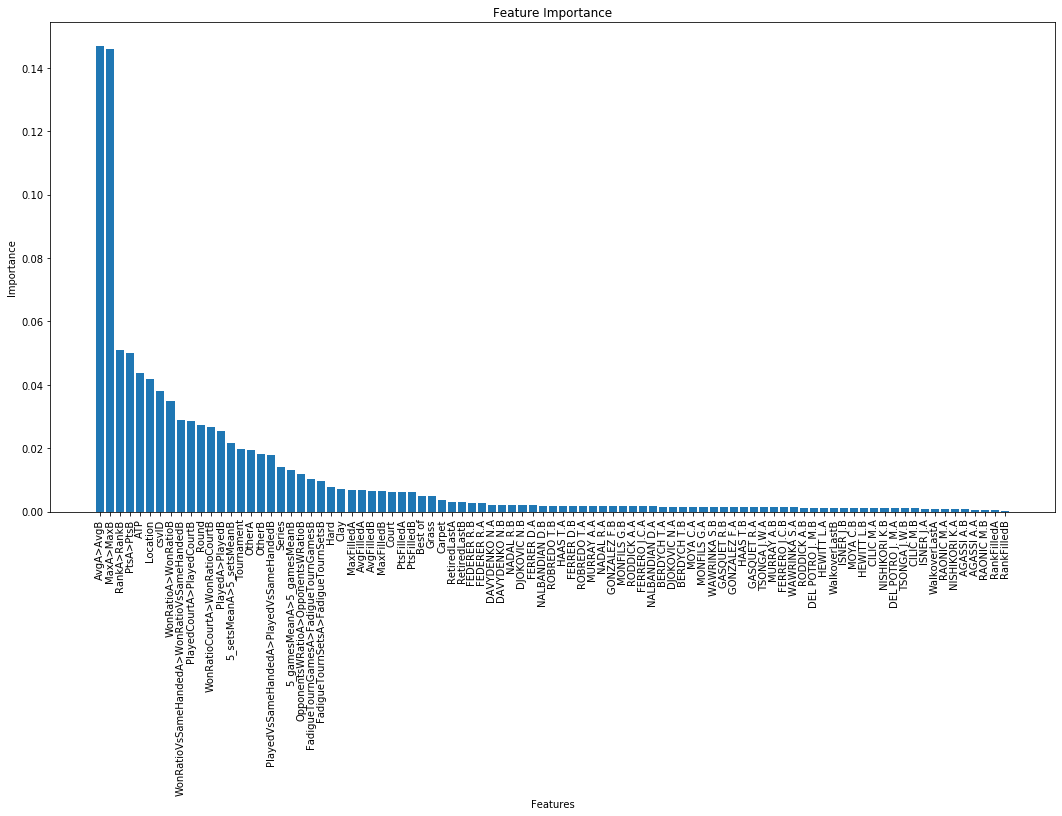

Wall time: 9.31 s


In [19]:
%%time

def get_best_features():
    x, _, y, _ = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],
                                                              dataframe['Winner'], test_size=0.33, shuffle=False,
                                                              stratify=None)

    rf = RandomForestClassifier(n_estimators = forest_best_features['n_estimators'], max_depth = forest_best_features['max_depth'])

    rf.fit(x,y)

    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = [x.columns[i] for i in indices]

    plt.figure(figsize=(18,9))
    plt.title("Feature Importance")
    plt.bar(range(x.shape[1]), importances[indices])
    plt.xticks(range(x.shape[1]), features, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()
    
get_best_features()

In [20]:
%%time
def get_best_features_RFE():
    
    x, _, y, _ = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],
                                                              dataframe['Winner'], test_size=0.33, shuffle=False,
                                                              stratify=None)
    
    rf = RandomForestClassifier(n_estimators = forest_best_features['n_estimators'], max_depth = forest_best_features['max_depth'])

    
    selector = RFE(rf, step=1, n_features_to_select=None)

    selector.fit(x,y)

    features = x.columns.values[selector.support_]

    features = np.append(features,['Winner'])

    print('Selected features by RFE:')
    print(features)
    return features

features = get_best_features_RFE()

Selected features by RFE:
['csvID' 'ATP' 'Location' 'Tournament' 'Series' 'Court' 'Round' 'Best of'
 'PtsFilledA' 'PtsFilledB' 'MaxFilledA' 'MaxFilledB' 'AvgFilledA'
 'AvgFilledB' 'Carpet' 'Clay' 'Grass' 'Hard' 'FEDERER R.B' 'FERRER D.A'
 'FERRER D.B' 'ROBREDO T.A' 'ROBREDO T.B' 'NALBANDIAN D.B' 'DAVYDENKO N.A'
 'DAVYDENKO N.B' 'OtherA' 'OtherB' 'RankA>RankB' 'MaxA>MaxB' 'AvgA>AvgB'
 'PtsA>PtsB' 'OpponentsWRatioA>OpponentsWRatioB'
 'FadigueTournGamesA>FadigueTournGamesB'
 'FadigueTournSetsA>FadigueTournSetsB' 'RetiredLastA' 'RetiredLastB'
 'PlayedA>PlayedB' 'WonRatioA>WonRatioB' 'PlayedCourtA>PlayedCourtB'
 'WonRatioCourtA>WonRatioCourtB' '5_gamesMeanA>5_gamesMeanB'
 '5_setsMeanA>5_setsMeanB' 'PlayedVsSameHandedA>PlayedVsSameHandedB'
 'WonRatioVsSameHandedA>WonRatioVsSameHandedB' 'Winner']
Wall time: 5min 17s


Best Estimators Number 150 - Accuracy: 0.661766421654416
Best Depth 9 - Accuracy: 0.6940263679850659
Wall time: 1min 40s


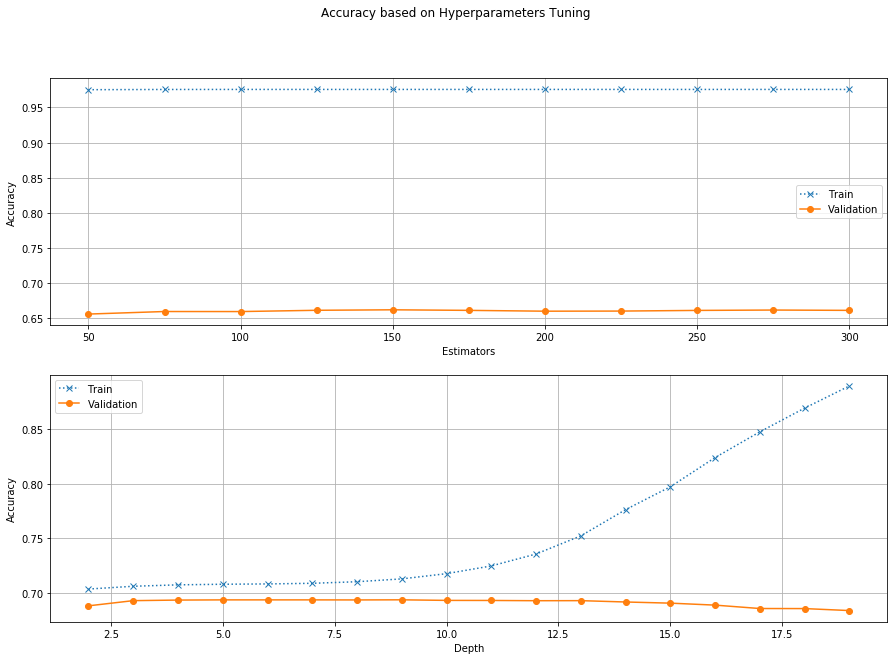

In [21]:
%%time
recursive_forest_best_features = valop.validate_forest_classifier(dataframe[features])

## Inspection of Prediction Results
Provo a misurare l'accuracy delle predizioni per le partite tra i giocatori più forti e per le partite tra i giocatori meno importanti, dal risultato è visibile come il modello predica più correttamente le partite giocate tra giocatori più forti ed abbia più difficoltà a predirre correttamente le partite giocate tra i giocatori più deboli.

Migliora ulteriormente l'accuracy per le partite dove almeno uno dei due giocatori è uno dei più importanti, questo probabilmente perché risulta più semplice prevedere il risultato della partita tra un giocatore forte e uno debole. 

In [23]:
def get_prediction_accuracy_on_best_players_matches(most_important = True, condition = 'or'):
    
    if most_important:
        binary_value = 1
    else:
        binary_value = 0
    
    x_train, x_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],
                                                          dataframe['Winner'], test_size=0.33, shuffle=False,
                                                          stratify=None)
    x_valid = x_valid.reset_index(drop = True)
    y_valid = y_valid.reset_index(drop = True)
    
    indexes_to_drop = []
    for v in x_valid.itertuples():
        if condition == 'or':
            if v.OtherA == binary_value or v.OtherB == binary_value:
                indexes_to_drop.append(v.Index)
        else:
            if v.OtherA == 1 and v.OtherB == 1:
                indexes_to_drop.append(v.Index)
            
    x_valid.drop(x_valid.index[indexes_to_drop], axis = 0, inplace = True)
    y_valid.drop(y_valid.index[indexes_to_drop], axis = 0, inplace = True)
    
    rf = RandomForestClassifier(n_estimators = forest_best_features['n_estimators'], 
                                max_depth = forest_best_features['max_depth'])

    rf.fit(x_train,y_train)
    
    score = accuracy_score(y_true=y_valid, y_pred=rf.predict(x_valid))
    
    if condition == 'or':
        if most_important:
            print('Accuracy on matches played by the most important players:', 
                  score)
        else:
            print('Accuracy on matches played by the least important players:', 
                  score)
    else:
        print('Accuracy on matches played by at least one important player:', 
                  score)
        
    return score

Accuracy on matches played by the most important players: 0.7333333333333333
Accuracy on matches played by the least important players: 0.6599084368868542
Accuracy on matches played by at least one important player: 0.7684317718940937


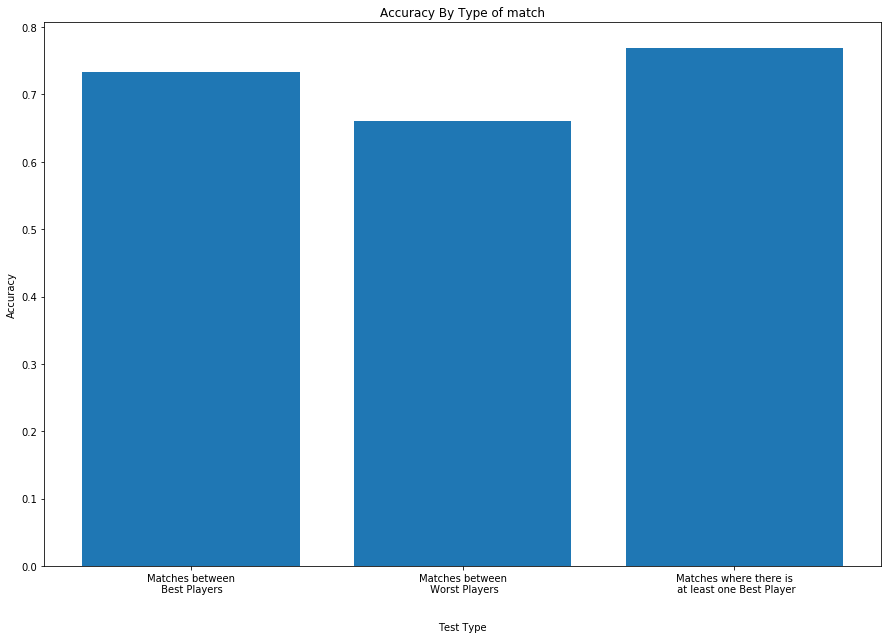

In [24]:
acc_best = get_prediction_accuracy_on_best_players_matches()
acc_worst = get_prediction_accuracy_on_best_players_matches(False)
acc_at_least_one_best = get_prediction_accuracy_on_best_players_matches(condition = 'and')

plt.figure(figsize=(15,10))
plt.title("Accuracy By Type of match")
plt.bar(range(3), [acc_best, acc_worst, acc_at_least_one_best])
plt.xticks(range(3), ['Matches between\n Best Players',
                     'Matches between\n Worst Players',
                     'Matches where there is\n at least one Best Player'])
plt.xlabel('\n\nTest Type')
plt.ylabel('Accuracy')
plt.show()

In [25]:
dataframe.to_csv('./datasets/dataframe_pred.csv', index = False)

In [26]:
%store forest_best_features

Stored 'forest_best_features' (dict)
